# Task 1: Data Scraping and Collection

This notebook demonstrates the implementation of the Telegram data scraping pipeline.

In [2]:
# Import necessary libraries
import os
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8')

In [10]:
# Display the directory structure created by the scraper
print("Data Lake Structure:")
!tree ../data/raw  # On Windows, you might need to use dir or ls depending on your environment

Data Lake Structure:
Too many parameters - #


In [9]:
# Load sample data from the data lake
import glob

# Find the most recent date folder
date_folders = glob.glob('../data/raw/telegram_messages/*')
print(f"Date folders found: {date_folders}")
if date_folders:
    latest_date = max(date_folders, key=os.path.getctime)
    print(f"Latest date folder: {latest_date}")
    
    # List JSON files in the latest date folder
    json_files = glob.glob(os.path.join(latest_date, '*.json'))
    print(f"JSON files found: {json_files}")
    
    if json_files:
        # Load the first JSON file as a sample
        with open(json_files[0], 'r', encoding='utf-8') as f:
            sample_data = json.load(f)
        
        print(f"\nSample data loaded. Number of messages: {len(sample_data)}")
        print("\nFirst message sample:")
        print(json.dumps(sample_data[0], indent=2))

Date folders found: ['../data/raw/telegram_messages\\2026-01-19', '../data/raw/telegram_messages\\2026-01-20']
Latest date folder: ../data/raw/telegram_messages\2026-01-20
JSON files found: ['../data/raw/telegram_messages\\2026-01-20\\lobelia4cosmetics.json', '../data/raw/telegram_messages\\2026-01-20\\Thequorachannel.json', '../data/raw/telegram_messages\\2026-01-20\\tikvahpharma.json']

Sample data loaded. Number of messages: 100

First message sample:
{
  "message_id": 22973,
  "channel_name": "lobelia4cosmetics",
  "channel_title": "Lobelia pharmacy and cosmetics",
  "message_date": "2026-01-20T12:39:51+00:00",
  "message_text": "B12 90 Gummies \nPrice 6000 birr \nTelegram @Lobeliacosmetics\nMsg\ud83d\udc49 Lobelia pharmacy and cosmetics \n\u260e\ufe0f call 0911562031/0911587703\nAdress:- Infront of Bole Medhanialem high school ALEMNESH PLAZA GROUND FLOOR \nOpen Monday - Monday from 8am until midnight \u12a8\u1230\u129e - \u12a5\u1235\u12a8 \u1230\u129e\u00a0 \u12a8\u1327\u1271 2:0


Data Statistics:
         message_id       views    forwards
count    100.000000   100.00000  100.000000
mean   22923.500000   347.62000    0.510000
std       29.011492   252.84861    0.893241
min    22874.000000    59.00000    0.000000
25%    22898.750000   183.75000    0.000000
50%    22923.500000   284.00000    0.000000
75%    22948.250000   414.75000    1.000000
max    22973.000000  1328.00000    4.000000

Channel Distribution:
channel_name
lobelia4cosmetics    100
Name: count, dtype: int64


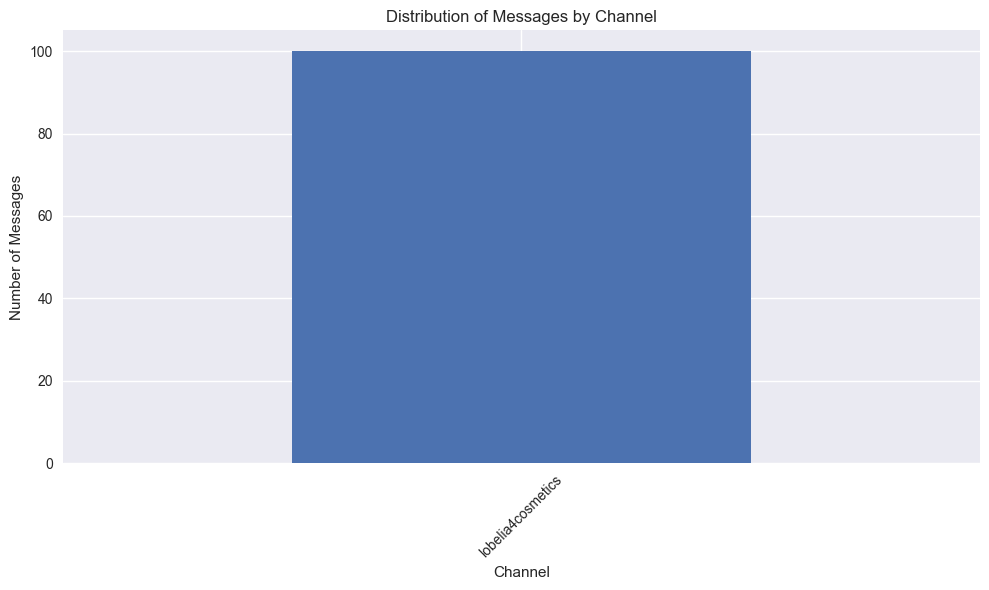

In [11]:
# Show statistics about the scraped data
if 'sample_data' in locals():
    df = pd.DataFrame(sample_data)
    print("\nData Statistics:")
    print(df.describe())
    
    print("\nChannel Distribution:")
    print(df['channel_name'].value_counts())
    
    # Plot channel distribution
    plt.figure(figsize=(10, 6))
    df['channel_name'].value_counts().plot(kind='bar')
    plt.title('Distribution of Messages by Channel')
    plt.xlabel('Channel')
    plt.ylabel('Number of Messages')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
# Check the logs
import glob

log_files = glob.glob('logs/scrape_*.log')
if log_files:
    latest_log = max(log_files, key=os.path.getctime)
    print(f"\nContent of the latest log file ({latest_log}):")
    with open(latest_log, 'r', encoding='utf-8') as f:
        print(f.read())

In [14]:
# Show image downloads
import os

image_dirs = [d for d in os.listdir('../data/raw/images') if os.path.isdir(os.path.join('../data/raw/images', d))]
print(f"Channels with downloaded images: {image_dirs}")

for channel in image_dirs:
    images = os.listdir(os.path.join('../data/raw/images', channel))
    print(f"{channel}: {len(images)} images downloaded")

Channels with downloaded images: ['CheMed123', 'lobelia4cosmetics', 'Thequorachannel', 'tikvahpharma']
CheMed123: 67 images downloaded
lobelia4cosmetics: 100 images downloaded
Thequorachannel: 76 images downloaded
tikvahpharma: 45 images downloaded


## Summary

Task 1 successfully implemented a Telegram scraping pipeline that:
1. Extracts messages from specified Ethiopian medical channels
2. Downloads associated images
3. Stores data in a structured data lake format
4. Maintains proper logging

The data is stored in a partitioned structure by date and channel, making it suitable for further processing.